Obtener conjuntos de datos de imágenes
==================================

<div class="admonition warning">PRECAUCIÓN 😱: El tema presentado en esta sección está clasificado como avanzado. El entendimiento de este contenido es totalmente opcional.</div>

Obtener un conjunto de datos para procesamiento de imágenes puede ser un tarea compleja dependiendo del problema a realizar. Muchas compañias tienen políticas de adquisición de datos específicas para resolver problemas complejos o muy de nicho. Sin embargo, en muchos casos las imágenes pueden ser recolectadas desde la misma web de manera automática. En este ejemplo, veremos como realizar esta automatización utilizando la API del motor de búsqueda Google.

## Extraer resultados de búsqueda de Google

Podemos utilizar la API de búsqueda de Google para extraer resultados del motor de búsqueda. Esto incluye también a las imágenes de Google. Esto lo podremos hacer de forma gratuita siempre y cuando no superemos las 100 imágenes descargadas al día.

> **¡Importante!** Necesitará crear una cuenta en Google Cloud Platform, o GCP, a pesar de utilizar la versión gratuita de este servicio. Note que para crear una cuenta deberá especificar una tarjeta de crédito. **Tenga especial cuidado en no superar el umbral de 100 solicitudes al día para mantenerse en la capa gratuita**.

### Habilitando la API de búsqueda de Google

Para poder utilziar la API de Google, es necesario disponer de las credenciales que permiten interactuar con la misma. Para ello crearemos un nuevo proyecto desde https://console.developers.google.com

1. Haga click en `ENABLE APIS AND SERVICES`
2. En el cuadro de búsqueda escriba `custom search API`

<img src="_images/data_api_search.png" />

3. Haga click en `ENABLE`
4. Dirijase a https://console.developers.google.com/apis/credentials donde se administran todas las credenciales para acceder a las APIs de Google.
5. Genere una nueva API key como se muestra

<img src="_images/data_api_key.png" width="600" />

6. Copie la nueva clave generada y peguela en un block de notas para su posterior uso. Esta será su `API KEY`.

<img src="_images/data_api_key_copy.png" width="600" />

### Creando un motor de búsqueda para utilizar en Python 

1. Dirijase a https://cse.google.com/cse/all, donde Google permite crear "motores" de busqueda privados para nuestra utilización personal. Crearemos un motor para utilizar en nuestros scripts.
2. Haga click en `ADD`
3. En `Sites to search` escriba `www.google.com` y haga click en `CREATE`
4. Entre al nuevo item que aparece listado y que acaba de crear bajo el nombre `Google`.
5. Copie el valor del campo `Search engine ID` utilizando el boton `COPY TO CLIPBOARD`
6. Habilite la búsqueda de imágenes tildando la opción `IMAGE SEARCH`

<img src="_images/data_image_search.png" width="600" />

### Utilizando la API desde Python

Utilizaremos la librería `Google-Images-Search` la cual está disponible en `pip`

```
pip install Google-Images-Search
```

In [ ]:
!pip install google-images-search

Primero deberemos crear un objeto de tipo `GoogleImagesSearch` para ejecutar las búsquedas de imágenes que necesitamos. En este punto también necesitaremos los dos secretos que generamos más arrivas siendo estos:

- La clave de acceso a la API, o `API KEY`.
- El identificador del motor de busqueda que creamos, `Search engine ID`

In [15]:
from google_images_search import GoogleImagesSearch

In [31]:
api_key = "AIzaXXXXXXXXXXXXXXXXXXXXXXXXXM1LeI"
search_engine_id  = "05cXXXXXXXXX159"
gis = GoogleImagesSearch(api_key, search_engine_id)

Especificamos los parámteros de búsqueda:

- `q`: Las palabras claves que usariamos para la búsqueda.
- `num`: La cantidad máxima de resultas a retornar.
- `safe`: El tipo de filtro de contenido a utilizar (`high`, `medium`, `off`)
- `fileType`: El tipo de archivo que estamos buscando.
- `imgType`: El tipo de imagen que estamos buscando (`clipart`, `photo`, `lineart`) 

In [32]:
_search_params = {
    'q'       : 'barco carguero',
    'num'     : 10,
    'safe'    : 'high',
    'fileType': 'jpg|png',
    'imgType' : 'photo',
}

Ejecutamos la búsqueda y le damos un nombre

In [33]:
gis.search(search_params=_search_params,custom_image_name='barco_carguero')

Creamos un directorio para guardar los resultados. En general, utilizaremos la siguiente convención: `[nombre_del_dataset]\[clase]`. En este caso lo llamaremos `barcos\carguero`. Note que estamos suponiendo que trabajamos en un conjunto de datos llamado "barcos", el cual ataca un problema de clasificación de barcos donde una de las posibles clases es "carguero".

In [23]:
!mkdir -p datasets/barcos/carguero

Descargamos las imágenes en el directorio indicado:

In [34]:
for image in gis.results():
    image.download('datasets/barcos/carguero')
    image.resize(500, 500)

> Note que podemos además cambiar el tamaño de las imagenes a dimensiones específicas. Esto puede resultar útil si no queremos hacer demasiado preprocesamiento en nuestros modelos.

Verifiquemos las imágenes descargadas:

In [35]:
ls datasets/barcos/carguero

'barco_carguero(1).jpg'  'barco_carguero(5).jpg'  'barco_carguero(9).jpg'
'barco_carguero(2).jpg'  'barco_carguero(6).jpg'   barco_carguero.jpg
'barco_carguero(3).jpg'  'barco_carguero(7).jpg'
'barco_carguero(4).jpg'  'barco_carguero(8).jpg'


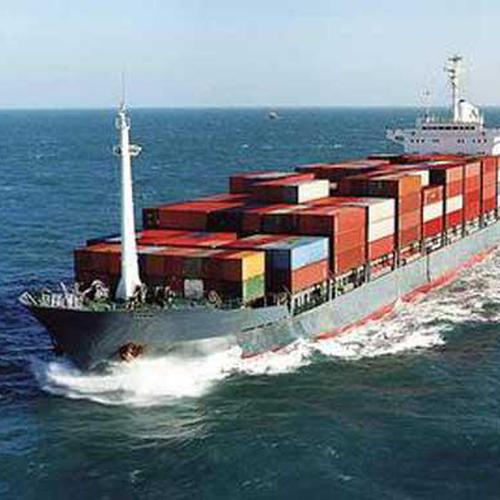

In [46]:
from IPython import display
display.Image("./datasets/barcos/carguero/barco_carguero(2).jpg")

## Anotaciones

Disponer de un conjunto de imágenes no necesariamente implica que dispone de un conjunto de datos de imágenes. En particular, es posible que deba invertir más trabajo en las anotaciones. En los problemas de clasificación deberá separar sus imágenes en diferentes directorios indicando a que clase pertencen. En problemas de detección por ejemplo, deberá generar las atonaciones que indican en que regiones de la imágen se encuentran cada uno de los objetos en los que está interesado. En la siguiente sección veremos como lograrlo.